# Implementation of the SPT Model - Testing

First, we don't model:
* the errors on the observables
* the halo mass function

In [1]:
from IPython.core.display import display, HTML

Modifications: Johnny Esteves <br>
Author: Allen Pinjic - Created on June 21st, 2022

In [2]:
from astropy.io.fits import getdata
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
from colossus.cosmology import cosmology
from colossus.lss import mass_function
from __future__ import print_function, division
cosmology.setCosmology('WMAP9')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as plt
import matplotlib.font_manager
import scipy.stats
import scipy.optimize
import seaborn as sns
import math
import os
import sys
import emcee
import pandas as pd

In [4]:
%matplotlib inline

# Creating an MCMC Model

Using the Simple Model Likelihood in order to see how accurate the predicted MCMC values are from the known true values

In [5]:
df = pd.read_csv('fake_data_Jun21.csv')
df

,z,M,lambda,zeta,lambda_true,zeta_true
0,0.233892,3.579864e+14,103.427606,6.532938,95.137239,7.239986
1,0.139343,3.012447e+14,77.422977,5.674946,78.679506,5.433497
2,0.168206,2.608140e+14,77.135877,5.493110,68.206373,4.384910
3,0.527714,1.216552e+14,33.270592,1.584931,33.174886,1.491692
4,0.249406,1.739850e+14,64.940017,3.173674,45.683035,2.402686
5,0.345124,2.490747e+14,65.897281,4.094000,66.865115,4.267375
6,0.398598,2.707922e+14,72.770826,3.760126,73.448254,4.918886
7,0.395387,3.666537e+14,90.507903,10.207722,100.001562,7.823619
8,0.402385,5.217508e+14,164.042491,14.074943,143.473955,13.465459
9,0.357487,1.801768e+14,51.775832,2.873238,48.152283,2.605033


In [6]:
SZ_Priors = {'A_sze':[5.24, 0.85], 'B_sze':[1.534, 0.100],'C_sze':[0.465, 0.407],
             'scatter_sze':[0.161, 0.080]}

sz_theta_values = ['A_sze', 'B_sze', 'C_sze', 'scatter_sze']

Lambda_Priors = {'A_lambda':[76.9, 8.2], 'B_lambda':[1.020, 0.080],'C_lambda':[0.23, 0.16],
             'scatter_lambda':[0.23, 0.16]}

lambda_theta_values = ['A_lambda', 'B_lambda', 'C_lambda', 'scatter_lambda']

In [7]:
mask = (df['lambda']>5)&(df['zeta']>3)
ix = np.where(mask)[0]
Np = ix.size

## changin here
yerr = 0.05*(df['lambda'].to_numpy())

redshift = (np.array(df['z']))[ix]
sz_signal = (np.array(df['zeta']))[ix]
_lambda = (np.array(df['lambda']))[ix]
_lambda_error = (np.array(yerr))[ix]
mass = np.array(df['M'])[ix]

print('Number of points',Np)

Number of points 314


In [8]:
# set up integration vectors
zvec = np.linspace(np.min(np.array(df['z'])), np.max(np.array(df['z'])), 100)
mvec = np.logspace(13.8, 15.2, 75)
lbdvec = np.linspace(3, 1.2*np.max(np.array(df['lambda'])), 300)
zetavec = np.linspace(1, 1.1*np.max(np.array(df['zeta'])), 150)

print('Vector size')
print(lbdvec.size)
print(zetavec.size)

Vector size
300
150


## Implementing Very Simple Model Likelihood

In [9]:
def ln_zeta_given_M(theta_sze,M,z):
    A_sze, B_sze, C_sze, scatter_sze = theta_sze
    return (np.log(A_sze) + (B_sze)*np.log(M/M0) + (C_sze)*(np.log(E(z)/Ez0)))

def ln_lbd_given_M(theta_lambda,M,z):
    A_lambda, B_lambda, C_lambda, scatter_lambda = theta_lambda
    return (np.log(A_lambda) + (B_lambda)*np.log(M/M0) + (C_lambda)*(np.log(E(z)/Ez0)))

def logNormal_variance(mu,std):
    return (np.exp(std**2)-1)*np.exp(2*mu+std**2)

def E(z):
    # The Hubble constant at the value of z
    Hz = cosmo.H(z).value
    # The Hubble constant at z=0
    H0 = cosmo.H(0).value
    return (Hz/H0)

M0 = 3e14
Ez0 = E(0)

In [10]:
# mmm had a shape (Ncls,300,150)

In [36]:
def log_likelihood_very_simple(theta):
    # unfolding theta
    A_lambda, B_lambda, C_lambda, scatter_lambda = theta[4:8]
    A_sze, B_sze, C_sze, scatter_sze = theta[:4]
    rho = theta[-1]
        
    # calling predictions;
    ln_lbd_pred = ln_lbd_given_M([A_lambda, B_lambda, C_lambda, scatter_lambda], mass, redshift)
    ln_zeta_pred= ln_zeta_given_M([A_sze, B_sze, C_sze, scatter_sze], mass, redshift)
        
    # compute dn_dlbd_dzeta_integrand
    # Now p_lbd_zeta instead of p_total_m = compute_dn_dlbd_dzeta_vec2
    lp_lbd_zeta = compute_log_pLbdZeta(_lambda, sz_signal,
                                       scatter_lambda, scatter_sze, rho,
                                       ln_lbd_pred, ln_zeta_pred)
    return np.nansum(lp_lbd_zeta)

def compute_log_pLbdZeta(Lambda, Zeta, scatter_lambda, scatter_sze, rho,
                         ln_lbd_pred, ln_zeta_pred, eps = 1e-9):
    # converting std to normal distribution
    s_zeta = scatter_sze#logNormal_variance(ln_zeta_pred, scatter_sze)
    s_lambda = scatter_lambda#logNormal_variance(ln_lbd_pred, scatter_lambda)
    
    s_lambda_inv = np.where(s_lambda<=eps, np.inf, 1/s_lambda)
    s_zeta_inv = np.where(s_zeta<=eps, np.inf, 1/s_zeta)
    
    # avoid error messages
    rho2 = (1-rho**2)
    rho_inv = np.where(rho2<=eps, np.inf, 1/rho2)
    
    cov = (s_lambda)**(2)*(s_zeta)**(2)*rho2
    additional_cov = (-0.5)*np.log(np.pi*cov**2)
        
    lbd_std = (np.log(Lambda) - ln_lbd_pred)*s_lambda_inv
    zeta_std = (np.log(Zeta) - ln_zeta_pred)*s_zeta_inv
    #np.seterr(invalid='ignore')

    # lbd_likelihood
    lp_lbd  = (-rho_inv*lbd_std**2)/2.

    # zeta likelihood
    lp_zeta = (-rho_inv*zeta_std**2)/2.

    # corr likelihod
    lp_corr = rho*rho_inv*lbd_std*zeta_std
    
    # total likelihood
    lp_total_m = lp_lbd + lp_zeta + lp_corr + additional_cov
    
    # logNomral term
    #lp_total_m += -np.log(Lambda)-np.log(Zeta)
    return lp_total_m

## Checking LogLikelihood Function

I know the true values used to generate the fake data. So I'll check if the true parameters are the ones that minimize the logLikelihood function.

In [37]:
theta_true = [5.24, 1.534, 0.465, 0.161, 76.9, 1.02, 0.29, 0.16, 0.8]
log_likelihood_very_simple(theta_true)

ValueError: too many values to unpack

In [ ]:
# a quick of 10% from the truth
initial = theta_true + 0.2 * np.random.randn(9)
log_likelihood_very_simple(initial)

In [ ]:
## plotting this results
np.random.seed(42)
lps = [-1.*log_likelihood_very_simple(theta_true)]
dist = [0.]
# increase the quick from the truth
for i in [1.,5.,10.,15.,20.,25.,30.,60]:
    initial = theta_true + (i/100.) * np.random.randn(9)
    nDist = np.linalg.norm(np.array(theta_true)-np.array(initial))
    lps.append(-1.*log_likelihood_very_simple(initial))
    dist.append(nDist)

In [15]:
lps

[-2053.7751584761227,
 -2016.410157061236,
 -1962.7964849123387,
 -1992.6828083606983,
 -1258.5147473769416,
 -1748.0144329352433,
 inf,
 -979.9555739427796,
 inf]

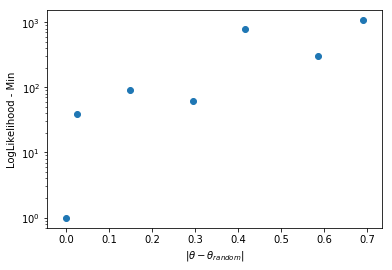

In [16]:
plt.scatter(dist,np.array(lps)-np.min(lps)+1.)
plt.ylabel('LogLikelihood - Min')
plt.xlabel(r'|$\theta-\theta_{random}$|')
plt.yscale('log')

In [17]:
import time
start = time.time()
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood_very_simple(*args)
initial = theta_true + 0.05 * np.random.randn(9)
soln = minimize(nll, initial)
end = time.time()
vsp_time = end - start
print("Very Simple Model took {0:.1f} seconds".format(vsp_time))

Very Simple Model took 0.2 seconds


/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in add
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


In [18]:
albd, blbd, clbd, slbd, rho = soln.x[4:]

print("Maximum likelihood estimates:")
print("Albd = {0:.3f}".format(albd))
print("Blbd = {0:.3f}".format(blbd))
print("Clbd = {0:.3f}".format(clbd))
print("Scatter_lbd = {0:.3f}".format(slbd))
print("rho: {0:.3f}".format(rho))

Maximum likelihood estimates:
Albd = 78.126
Blbd = 0.957
Clbd = 0.337
Scatter_lbd = 0.113
rho: 0.730


In [19]:
theta_true

[5.24, 1.534, 0.465, 0.161, 76.9, 1.02, 0.29, 0.16, 0.8]

In [20]:
soln.x

array([ 5.38908631,  1.42927353,  0.42691222,  0.11630843, 78.12588735,
        0.95684493,  0.33658859,  0.11280197,  0.72992462])

## Implementing Simple LogLikelihood Model

In [21]:
from scipy.integrate import simps

# given: mvec, lbdvec and zetavec

zz, ll = np.meshgrid(zetavec, lbdvec, indexing='ij')

def log_likelihood_vec2(theta, indices, eps=1e-9):
    # defining variables
    probs = []
    for ix in indices:
        probs.append(_log_likelihood2(theta, ix))
    p = np.array(probs)#/np.sum(probs)
    log_p = np.log(p)
    log_p = np.where(np.isnan(log_p), -np.inf, log_p)
    return np.sum(log_p)

def _log_likelihood2(theta, ix):
    # unfolding theta
    A_lambda, B_lambda, C_lambda, scatter_lambda = theta[4:8]
    A_sze, B_sze, C_sze, scatter_sze = theta[:4]
    rho = theta[-1]
    
    # forgot the mass
    mass_i = mass[ix]
    redshift_i = redshift[ix]
    p_chisi = prob_chisi_vec[ix]
    p_lbd_hat = prob_lbd_hat_vec[ix]
    llo, lup = list(lbd_indices_vec[ix])
    clo, cup = list(zeta_indices_vec[ix])
    
    # calling predictions;
    ln_lbd_pred = ln_lbd_given_M([A_lambda, B_lambda, C_lambda, scatter_lambda], mass_i, redshift_i)
    ln_zeta_pred= ln_zeta_given_M([A_sze, B_sze, C_sze, scatter_sze], mass_i, redshift_i)
        
    #hmf = np.tile(halo_mass_func, (int(lup-llo), int(cup-clo), 1)).T
    
    # has shape (150, 300)
    ln_lbd_pred = np.tile(ln_lbd_pred, (int(lup-llo), int(cup-clo))).T
    ln_zeta_pred = np.tile(ln_zeta_pred, (int(lup-llo), int(cup-clo))).T
    
    #print("This is ln_lbd_pred shape:", ln_lbd_pred.shape)
    #print("This is ln_zeta_pred shape:", ln_zeta_pred.shape)
    
    # compute dn_dlbd_dzeta_integrand
    # Now p_lbd_zeta instead of p_total_m = compute_dn_dlbd_dzeta_vec2
    p_lbd_zeta = compute_dn_dlbd_dzeta_vec2(_lambda_i, _lambda_error_i, sz_signal_i,
                                           scatter_lambda, scatter_sze, rho,
                                           ll[clo:cup,llo:lup],zz[clo:cup,llo:lup],
                                           ln_lbd_pred, ln_zeta_pred)

    # integrate over zeta
    p_chisi = np.tile(p_chisi[clo:cup], (int(lup-llo), 1)).T
    p_lbd = np.trapz(p_lbd_zeta*p_chisi, x=zetavec[clo:cup], axis=0)

    # integrate over lambda
    p = np.trapz(p_lbd*p_lbd_hat[llo:lup], x=lbdvec[llo:lup], axis=0)
    return p

In [22]:
def compute_dn_dlbd_dzeta_vec2(_lambda_i, _lambda_error_i, sz_signal_i, scatter_lambda, scatter_sze, rho,
                               lvec, zvec, ln_lbd_pred, ln_zeta_pred, eps = 1e-9):
    
    # converting std to normal distribution
    s_zeta = scatter_sze#logNormal_variance(ln_zeta_pred, scatter_sze)
    s_lambda = scatter_lambda#logNormal_variance(ln_lbd_pred, scatter_lambda)
    
    s_lambda_inv = np.where(s_lambda<=eps, np.inf, 1/s_lambda)
    s_zeta_inv = np.where(s_zeta<=eps, np.inf, 1/s_zeta)
    
    cov = (scatter_lambda)**(2)*(scatter_sze)**(2)*(1-rho**2)
    additional_cov = (-0.5)*np.log(np.pi*cov**2)
    
    # avoid error messages
    rho_inv = (1-rho**2)
    rho_inv = np.where(rho_inv<=eps, np.inf, 1/rho_inv)
    
    lbd_std = (np.log(lvec) - (ln_lbd_pred))*s_lambda_inv
    zeta_std = (np.log(zvec)- (ln_zeta_pred))*s_zeta_inv
    #np.seterr(invalid='ignore')

    # lbd_likelihood
    lp_lbd  = (-rho_inv*lbd_std**2)/2

    # zeta likelihood
    lp_zeta = (-rho_inv*zeta_std**2)/2

    # corr likelihod
    lp_corr = rho*rho_inv*lbd_std*zeta_std

    lp_total_m = lp_lbd + lp_zeta + lp_corr + additional_cov
    
    p_total_m = np.exp(lp_total_m)#/(lvec*zvec)
    
    return p_total_m

In [23]:
def prob_chisi(zeta, sz_signal, eps=1e-12):
    res = np.exp(-(sz_signal-np.sqrt(zeta**2+2))**2/2.)/np.sqrt(2*np.pi)
    return res#np.where(res<eps,0.,res)

def gaussian(x,mu,std):
    return np.exp(-(x-mu)**2/std**2/2.)/np.sqrt(2*np.pi*std**2)

def prob_lbd_hat(x, mean , std, eps=1e-12):
    res = gaussian(x, mean , std)
    return res#np.where(res<eps,0.,res)

def slice_array(y,alpha=1e-2):
    cy = np.cumsum(y/np.sum(y),axis=0)
    ilo,iup = np.interp([alpha,1-alpha],cy,np.arange(len(y))).astype(int)+(0,2)
    return ilo, iup

In [24]:
alpha = 0.01

prob_lbd_hat_vec = np.array([prob_lbd_hat(lbdvec, _lambda_i, _lambda_error_i)
                             for _lambda_i, _lambda_error_i in zip(_lambda, _lambda_error)])
# print(prob_lbd_hat_vec.shape)
# print("This is prob_lbd_hat_vec :", prob_lbd_hat_vec)

prob_chisi_vec = np.array([prob_chisi(zetavec, sz_signal_i) for sz_signal_i in sz_signal])
# print(prob_chisi_vec.shape)
# print("This is prob_chisi_vec:", prob_chisi_vec)


lbd_indices_vec = np.array([slice_array(pi, alpha=alpha) for pi in prob_lbd_hat_vec])
print(lbd_indices_vec.shape)
# print("This is lbd_indices_vec:", lbd_indices_vec)

zeta_indices_vec = np.array([slice_array(pi, alpha=alpha) for pi in prob_chisi_vec])
print(zeta_indices_vec.shape)
# print("This is zeta_indices_vec:", zeta_indices_vec)

(314, 2)
(314, 2)


In [25]:
def set_gaussian_prior(param, mu, sigma):
    return -0.5*((param - mu)/(sigma))**2

# Setting SZE priors
def set_prior_sze(theta_values):
    lp = 0.
    rhomin = 0.
    rhomax = 1.
    
    for i, prior_name in enumerate(['A_sze', 'B_sze', 'C_sze', 'scatter_sze']):
        mean, error = SZ_Priors[prior_name]
        param = theta_values[i]
        result = set_gaussian_prior(param, mean, error)
        lp += np.where(np.abs(result)>9., -np.inf, result)
        # outside a range of six sigmas (six standard deviations)
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range 
    lp = 0. if (theta_values[-1] > 0) else -np.inf
    return lp

# Setting Lambda priors
def set_prior_lambda(theta_values):
    lp = 0.
    rhomin = 0.
    rhomax = 1.
    
    for i, prior_name in enumerate(['A_lambda', 'B_lambda', 'C_lambda', 'scatter_lambda']):
        mean, error = Lambda_Priors[prior_name]
        param = theta_values[i]
        result = set_gaussian_prior(param, mean, error)
        lp += np.where(np.abs(result)>9., -np.inf, result)
        # outside a range of six sigmas (six standard deviations)
       
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range 
    lp = 0. if (theta_values[-1] > 0) else -np.inf
    return lp

def logprior(theta):
    lp = 0
    
    A_lambda, B_lambda, C_lambda, scatter_lambda = theta[4:8]
    A_sze, B_sze, C_sze, scatter_sze = theta[:4]
    rho = theta[-1]
    
    lp_lambda = set_prior_lambda([A_lambda, B_lambda, C_lambda, scatter_lambda])
    lp_sze = set_prior_sze([A_sze, B_sze, C_sze, scatter_sze])
    
    lp = 0. if ((rho > 0) and (rho < 1)) else -np.inf
    return lp + lp_lambda + lp_sze

def logposterior(theta, indices):
    lp = logprior(theta)
    
    # if the prior is not finite return a probability of zero (log probability of -inf)
    if not np.isfinite(lp):
        return -np.inf
    
    # return the likeihood times the prior (log likelihood plus the log prior)
    return lp + log_likelihood_vec2(theta, indices, eps=1e-9)

In [26]:
theta_true = [5.24, 1.534, 0.465, 0.161, 76.9, 1.02, 0.29, 0.16, 0.8]
indices = np.arange(len(mass))
logposterior(theta_true, indices)

1953.3438024661345

In [27]:
# a quick of 10% from the truth
initial = theta_true + 0.1 * np.random.randn(9)
logposterior(initial,indices)

1632.5909025364897

In [28]:
## plotting this results
np.random.seed(42)
lps = [-1.*logposterior(theta_true,indices)]
dist = [0.]
# increase the quick from the truth
for i in [1.,2.5,5.,7.5,10.,15.,20.,25.,30.,60]:
    initial = theta_true + (i/100.) * np.random.randn(9)
    nDist = np.linalg.norm(np.array(theta_true)-np.array(initial))
    lps.append(-1.*logposterior(initial,indices))
    dist.append(nDist)

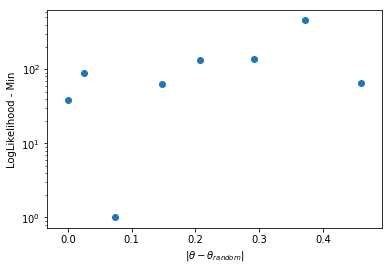

In [29]:
plt.scatter(dist,np.array(lps)-np.min(lps)+1.)
plt.ylabel('LogLikelihood - Min')
plt.xlabel(r'|$\theta-\theta_{random}$|')
plt.yscale('log')

In [30]:
initial = theta_true + (5/100.) * np.random.randn(9)

In [31]:
theta_true

[5.24, 1.534, 0.465, 0.161, 76.9, 1.02, 0.29, 0.16, 0.8]

In [32]:
100*(initial-theta_true)/theta_true

array([  0.09263125,   3.15725225,  -7.548958  , -10.17584306,
        -0.02549468,  -7.17409288,   5.10552202,   8.15797726,
         0.0319591 ])

In [33]:
import time
from scipy.optimize import minimize

start = time.time()
np.random.seed(42)
nll = lambda *args: -logposterior(*args)
initial = theta_true + 0.05 * np.random.randn(9)
soln = minimize(nll, initial, args=indices)
end = time.time()
sp_time = end - start
print("Simple Model took {0:.1f} seconds".format(sp_time))
print("It is {} slower than the very simple model".format(sp_time/vsp_time))

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


Simple Model took 151.1 seconds
It is 865.876626978 slower than the very simple model


In [34]:
albd, blbd, clbd, slbd, rho = soln.x[4:]

print("Maximum likelihood estimates:")
print("Albd = {0:.3f}".format(albd))
print("Blbd = {0:.3f}".format(blbd))
print("Clbd = {0:.3f}".format(clbd))
print("Scatter_lbd = {0:.3f}".format(slbd))
print("rho: {0:.3f}".format(rho))

Maximum likelihood estimates:
Albd = 78.319
Blbd = 0.960
Clbd = 0.331
Scatter_lbd = 0.108
rho: 0.999


In [35]:
np.corrcoef(np.log(_lambda),np.log(sz_signal))

array([[1.        , 0.95716345],
       [0.95716345, 1.        ]])

In [ ]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood_vec2(*args)
initial = theta + 0.1 * np.random.randn(9)
soln = minimize(nll, initial, args=sel)
albd, blbd, clbd, slbd, rho = soln.x[4:]

print("Maximum likelihood estimates:")
print("Albd = {0:.3f}".format(albd))
print("Blbd = {0:.3f}".format(blbd))
print("Clbd = {0:.3f}".format(clbd))
print("Scatter_lbd = {0:.3f}".format(slbd))
print("rho: {0:.3f}".format(rho))

In [21]:
def _log_likelihood2(theta, ix):
    # unfolding theta
    A_lambda, B_lambda, C_lambda, scatter_lambda = theta[4:8]
    A_sze, B_sze, C_sze, scatter_sze = theta[:4]
    rho = theta[-1]
    
    # forgot the mass
    mass_i = mass[ix]
    redshift_i = redshift[ix]
    p_chisi = prob_chisi_vec[ix]
    p_lbd_hat = prob_lbd_hat_vec[ix]
    llo, lup = list(lbd_indices_vec[ix])
    clo, cup = list(zeta_indices_vec[ix])
    
    # calling predictions;
    ln_lbd_pred = ln_lbd_given_M([A_lambda, B_lambda, C_lambda, scatter_lambda], mass_i, redshift_i)
    ln_zeta_pred= ln_zeta_given_M([A_sze, B_sze, C_sze, scatter_sze], mass_i, redshift_i)
        
    #hmf = np.tile(halo_mass_func, (int(lup-llo), int(cup-clo), 1)).T
    ln_lbd_pred = np.tile(ln_lbd_pred, (int(lup-llo), int(cup-clo))).T
    ln_zeta_pred = np.tile(ln_zeta_pred, (int(lup-llo), int(cup-clo))).T
    #print("This is ln_lbd_pred shape:", ln_lbd_pred.shape)
    #print("This is ln_zeta_pred shape:", ln_zeta_pred.shape)
    
    # compute dn_dlbd_dzeta_integrand
    # Now p_lbd_zeta instead of p_total_m = compute_dn_dlbd_dzeta_vec2
    p_lbd_zeta = compute_dn_dlbd_dzeta_vec2(_lambda_i, _lambda_error_i, sz_signal_i,
                                           scatter_lambda, scatter_sze, rho,
                                           ll[clo:cup,llo:lup],zz[clo:cup,llo:lup],
                                           ln_lbd_pred, ln_zeta_pred)

    # integrate over zeta
    p_chisi = np.tile(p_chisi[clo:cup], (int(lup-llo), 1)).T
    p_lbd = np.trapz(p_lbd_zeta*p_chisi, x=zetavec[clo:cup], axis=0)

    # integrate over lambda
    p = np.trapz(p_lbd*p_lbd_hat[llo:lup], x=lbdvec[llo:lup], axis=0)
    return p

In [22]:
def compute_dn_dlbd_dzeta_vec2(_lambda_i, _lambda_error_i, sz_signal_i, scatter_lambda, scatter_sze, rho,
                               lvec, zvec, ln_lbd_pred, ln_zeta_pred, eps = 1e-9):
    
    # converting std to normal distribution
    s_zeta = logNormal_variance(ln_zeta_pred, scatter_sze)
    s_lambda = logNormal_variance(ln_lbd_pred, scatter_lambda)
    
    s_lambda_inv = np.where(s_lambda<=eps, -np.inf, 1/s_lambda)
    s_zeta_inv = np.where(s_zeta<=eps, -np.inf, 1/s_zeta)
    
    cov = (scatter_lambda)**(2)*(scatter_sze)**(2)*(1-rho**2)
    additional_cov = (-0.5)*np.log(np.pi*cov**2)
    
    # avoid error messages
    rho_inv = (1-rho**2)
    rho_inv = np.where(rho_inv<=eps, -np.inf, 1/rho_inv)
    
    lbd_std = (np.log(lvec) - (ln_lbd_pred))*s_lambda_inv
    zeta_std = (np.log(zvec)- (ln_zeta_pred))*s_zeta_inv
    np.seterr(invalid='ignore')

    # lbd_likelihood
    lp_lbd  = (-rho_inv*lbd_std**2)/2

    # zeta likelihood
    lp_zeta = (-rho_inv*zeta_std**2)/2

    # corr likelihod
    lp_corr = rho*rho_inv*lbd_std*zeta_std

    lp_total_m = lp_lbd + lp_zeta + lp_corr + additional_cov
    
    p_total_m = (np.exp(lp_total_m))/(lvec*zvec)
    
    return p_total_m

In [23]:
def set_gaussian_prior(param, mu, sigma):
    return -0.5*((param - mu)/(sigma))**2

# Setting SZE priors
def set_prior_sze(theta_values):
    lp = 0.
    rhomin = 0.
    rhomax = 1.
    
    for i, prior_name in enumerate(['A_sze', 'B_sze', 'C_sze', 'scatter_sze']):
        mean, error = SZ_Priors[prior_name]
        param = theta_values[i]
        result = set_gaussian_prior(param, mean, error)
        lp += np.where(np.abs(result)>9., -np.inf, result)
        # outside a range of six sigmas (six standard deviations)
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range 
    lp = 0. if (theta_values[-1] > 0) else -np.inf
    return lp

# Setting Lambda priors
def set_prior_lambda(theta_values):
    lp = 0.
    rhomin = 0.
    rhomax = 1.
    
    for i, prior_name in enumerate(['A_lambda', 'B_lambda', 'C_lambda', 'scatter_lambda']):
        mean, error = Lambda_Priors[prior_name]
        param = theta_values[i]
        result = set_gaussian_prior(param, mean, error)
        lp += np.where(np.abs(result)>9., -np.inf, result)
        # outside a range of six sigmas (six standard deviations)
       
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range 
    lp = 0. if (theta_values[-1] > 0) else -np.inf
    return lp

def logprior(theta):
    lp = 0
    
    A_lambda, B_lambda, C_lambda, scatter_lambda = theta[4:8]
    A_sze, B_sze, C_sze, scatter_sze = theta[:4]
    rho = theta[-1]
    
    lp_lambda = set_prior_lambda([A_lambda, B_lambda, C_lambda, scatter_lambda])
    lp_sze = set_prior_sze([A_sze, B_sze, C_sze, scatter_sze])
    
    lp = 0. if ((rho > 0) and (rho < 1)) else -np.inf
    return lp + lp_lambda + lp_sze

In [24]:
logprior(theta)

0.0

In [25]:
def logposterior(theta, indices):
    lp = logprior(theta)
    
    # if the prior is not finite return a probability of zero (log probability of -inf)
    if not np.isfinite(lp):
        return -np.inf
    
    # return the likeihood times the prior (log likelihood plus the log prior)
    return lp + log_likelihood_vec2(theta, indices, eps=1e-9)

In [26]:
#set_prior_sze([5.24, 1.534, 0.465, 0.161])

In [27]:
Nburnin = 600 # number of burn-in samples
Nsamples = 1800 # number of final posterior samples
walkers = 100
ndims = len(theta)

guess = (np.array(theta)[:, np.newaxis]*(1.+0.01*np.random.normal(size=(ndims,walkers)))).T

# set additional args for the posterior (the data, the noise std. dev., and the abscissa)
sel = np.arange(len(redshift))#[:100]
sel = np.random.randint(len(redshift), size=100, dtype=int)
argslist = [sel]

In [28]:
logposterior(theta, sel)

-471.9439697957162

In [60]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood_vec2(*args)
initial = theta + 0.1 * np.random.randn(9)
soln = minimize(nll, initial, args=sel)
albd, blbd, clbd, slbd, rho = soln.x[4:]

print("Maximum likelihood estimates:")
print("Albd = {0:.3f}".format(albd))
print("Blbd = {0:.3f}".format(blbd))
print("Clbd = {0:.3f}".format(clbd))
print("Scatter_lbd = {0:.3f}".format(slbd))
print("rho: {0:.3f}".format(rho))

Maximum likelihood estimates:
Albd = 35.149
Blbd = 1.115
Clbd = 0.197
Scatter_lbd = 0.220
rho: 1.000


In [61]:
theta

[5.24, 1.534, 0.465, 0.161, 76.9, 1.02, 0.29, 0.16, 0.8]

In [29]:
import time
from multiprocessing import Pool

pool = Pool(processes=64)              # start 64 worker processes
sampler = emcee.EnsembleSampler(walkers, ndims, logposterior,args=[np.arange(len(mass))], pool=pool)
start = time.time()
sampler.run_mcmc(guess, Nsamples+Nburnin)
end = time.time()
multi_time = end - start
serial_time = (1.5)*(3600)
print("Multiprocessing took {0:.1f} seconds".format(multi_time))
print("{0:.1f} times faster than serial".format(serial_time / multi_time))

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_laun

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_laun

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/env

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in multiply
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/env

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero enco

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in t

Multiprocessing took 1656467277.5 seconds
0.0 times faster than serial


In [32]:
multi_time = end - start

In [34]:
multi_time/60.

16.92426286538442

In [44]:
flat_samples = sampler.flatchain

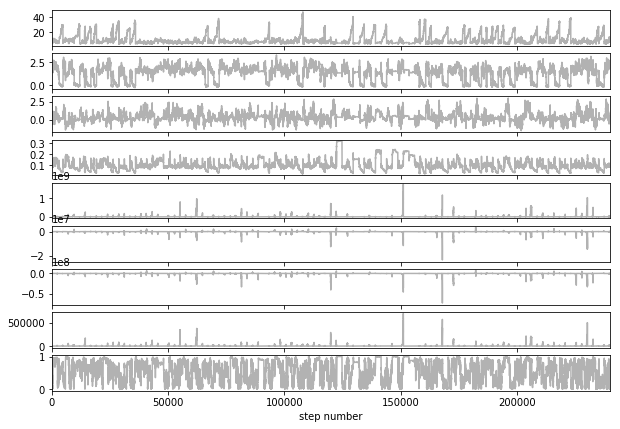

In [51]:
fig, axes = plt.subplots(ndims, figsize=(10, 7), sharex=True)
samples = flat_samples
for i in range(ndims):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    #ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

9

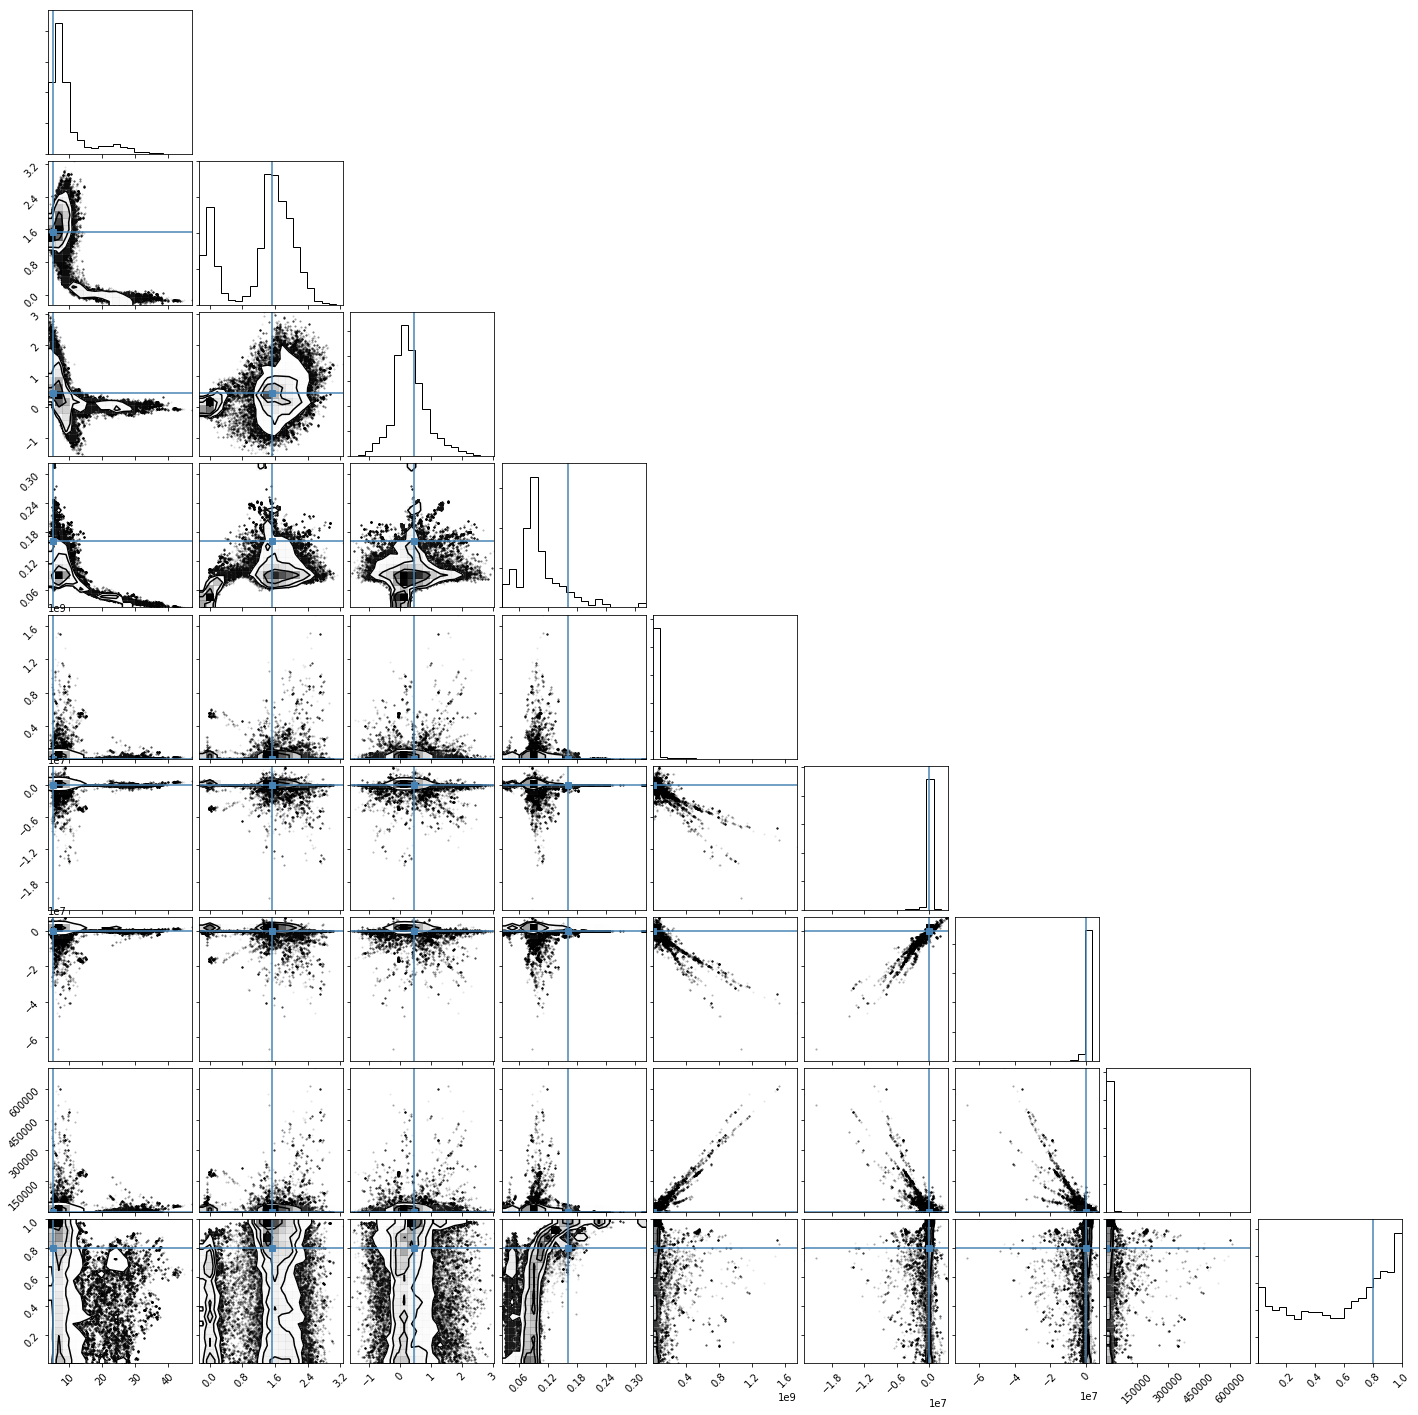

In [47]:
import corner

fig = corner.corner(
    flat_samples, truths=theta
);

In [165]:
import time
from multiprocessing import Pool

with Pool(processes = 64) as pool:
    sampler = emcee.EnsembleSampler(walkers, ndims, logposterior,args=argslist, pool=pool)
    start = time.time()
    sampler.run_mcmc(guess, Nsamples+Nburnin, progress=True)
    end = time.time()
    multi_time = end - start
    serial_time = (1.5)*(3600)
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))
    print("{0:.1f} times faster than serial".format(serial_time / multi_time))

AttributeError: __exit__

Process PoolWorker-227:
Process PoolWorker-249:
Process PoolWorker-198:
Process PoolWorker-253:
Process PoolWorker-214:
Process PoolWorker-221:
Process PoolWorker-195:
Process PoolWorker-225:
Process PoolWorker-219:
Process PoolWorker-197:
Process PoolWorker-251:
Process PoolWorker-240:
Process PoolWorker-242:
Process PoolWorker-230:
Process PoolWorker-234:
Process PoolWorker-211:
Process PoolWorker-232:
Process PoolWorker-228:
Process PoolWorker-243:
Process PoolWorker-246:
Process PoolWorker-222:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceb

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
KeyboardInterrupt
    self._target(*self._args, **self._kwargs)
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/lib/python2.7/multiprocessing/pool.py", line 102, in worker
    task = get()
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/lib/python2.7/multiprocessing/queues.py", line 374, in get
    racquire()
KeyboardInterrupt
Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
  File "/cvmfs/des.opensciencegrid

In [167]:
with Pool(processes = 32) as pool:
    start = time.time()
    end = time.time()
    multi_time = end - start
    serial_time = (1.5)*(3600)
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))
    print("{0:.1f} times faster than serial".format(serial_time / multi_time))

AttributeError: __exit__

Process PoolWorker-322:
Process PoolWorker-337:
Process PoolWorker-350:
Process PoolWorker-330:
Process PoolWorker-334:
Process PoolWorker-348:
Process PoolWorker-332:
Process PoolWorker-335:
Process PoolWorker-339:
Process PoolWorker-345:
Process PoolWorker-323:
Process PoolWorker-325:
Process PoolWorker-326:
Process PoolWorker-336:
Process PoolWorker-340:
Process PoolWorker-352:
Process PoolWorker-343:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap


# Make Simulated Data

In [37]:
sigma_chisi, sigma_lbd = 0.16, 0.169
rho = 0.79
Nclusters = 100000
# Cluster is defined as Mass (M) and redshift (z)

In [38]:
mfakes = 10**(np.random.uniform(14,15.2, size=Nclusters))
zfakes = np.random.uniform(0.1, 1.3, size=Nclusters)
# No "10^" for zfakes?
# Creating Nclusters number of fake mass 
# and redshift samples that are uniformly distributed

In [39]:
def _halo_mass_function(M, z):
    return mass_function.massFunction(M, z, mdef = '500c', model = 'bocquet16')
halo_mass_function = np.vectorize(_halo_mass_function)

def E(z):
    # The Hubble constant at the value of z
    Hz = cosmo.H(z).value
    # The Hubble constant at z=0
    H0 = cosmo.H(0).value
    return (Hz/H0)

In [40]:
p_halos = halo_mass_function(mfakes, zfakes)

indices_halos = np.random.choice(Nclusters, size = 1000, p = (p_halos/(np.sum(p_halos))))
# size = Nclusters/100 or 100,000/100 = 1000

In [41]:
# The creation of the fake samples for redshift and mass
# by chnaging the distribution from uniform to parabolic
zsims = zfakes[indices_halos]
msims = mfakes[indices_halos]

In [29]:
def ln_zeta_given_M(theta_sze,M,z):
    A_sze, B_sze, C_sze, scatter_sze = theta_sze
    return (np.log(A_sze) + (B_sze)*np.log(M/M0) + (C_sze)*(np.log(E(z)/Ez0)))

def ln_lbd_given_M(theta_lambda,M,z):
    A_lambda, B_lambda, C_lambda, scatter_lambda = theta_lambda
    return (np.log(A_lambda) + (B_lambda)*np.log(M/M0) + (C_lambda)*(np.log(E(z)/Ez0)))

def logNormal_variance(mu,std):
    return (np.exp(std**2)-1)*np.exp(2*mu+std**2)
#mean = [lbd_true, zeta_true]

In [43]:
M0 = 3e14
Ez0 = E(0)
# Ez2 = interpolate.interp1d(zvec, E(zvec), kind='cubic')
# NEEDED? CUBIC?

theta = [5.24, 1.534, 0.465, 0.161, 76.9, 1.02, 0.29, 0.16, 0.8]

A_lambda, B_lambda, C_lambda, scatter_lambda = theta[4:8]
A_sze, B_sze, C_sze, scatter_sze = theta[:4]
rho = theta[-1]

ln_zeta_true = ln_zeta_given_M([A_sze, B_sze, C_sze, scatter_sze], msims, zsims)
ln_lambda_true = ln_lbd_given_M([A_lambda, B_lambda, C_lambda, scatter_lambda], msims, zsims)


In [15]:
# To correlate them:
Cov = np.matrix(([sigma_lbd**2, rho*sigma_lbd*sigma_chisi], [rho*sigma_lbd*sigma_chisi, sigma_lbd**2]))

# for a given cluster: msims, zsims

ln_lambda, ln_zeta = [], []
for i in range(len(ln_lambda_true)):
    ln_lambdai, ln_zetai = np.random.multivariate_normal([ln_lambda_true[i],ln_zeta_true[i]],cov=Cov)
    ln_lambda.append(ln_lambdai)
    ln_zeta.append(ln_zetai)
    
# Final dataset --> (zsims, msims, ln_lambda, ln_zeta, ln_lambda_true, ln_zeta_true)

In [18]:
# Changes the size of the graph and font
from scipy.optimize import curve_fit

# sns.set_theme(style="darkgrid")
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

Combination of Slope and Y-Intercept: [  2.34013568 -29.47114719]
Slope: 2.3401356760119048
Y-Intercept: -29.471147194150532


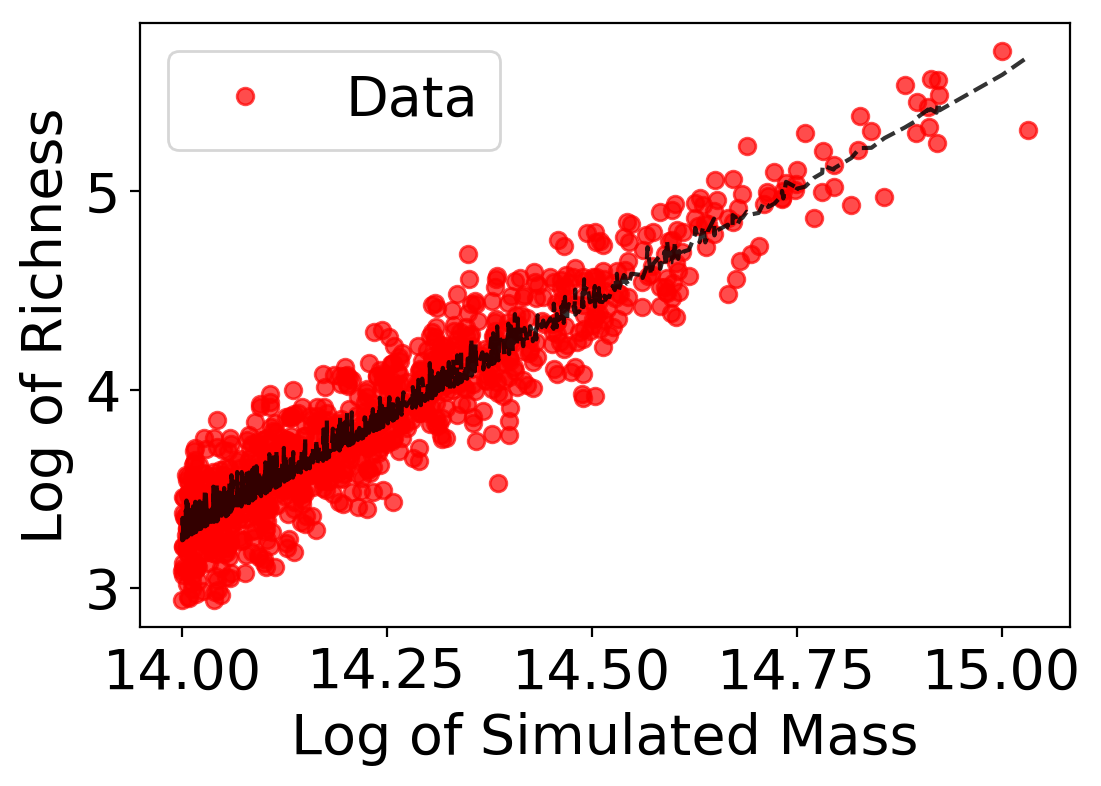

In [31]:
log_msims = np.log(msims/M0)

x1 = np.log10(msims)
y1 = ln_lambda
ix = np.argsort(log_msims)

f=lambda x,a,b: a*x + b
fit=curve_fit(f, x1, y1)
xsmooth=np.linspace(np.min(x1), np.max(x1), 1000)
plt.plot(x1,y1,'ro',label='Data', alpha = 0.7)
#plt.plot(xsmooth,f(xsmooth,*fit[0]),'b-',linewidth=2,label='Logarithmic Fit')
plt.xlabel('Log of Simulated Mass')
plt.ylabel('Log of Richness')
plt.legend()

# Unlike the 1-D plot above (simple straight line), this is a vector that
# will create a slope which matches the log value from the previously
# calculated log of lambda based on the true parameter values
# found in (Grandis et al. 2021)

# Meant to compare with the simple 1-D plot above and display
# whether the simulated data is following the trend set by the real parameter values

plt.plot(x1[ix], ln_lambda_true[ix], 'k--', label='Truth', alpha = 0.8)

print('Combination of Slope and Y-Intercept:', fit[0])
print('Slope:', fit[0][0])
print('Y-Intercept:', fit[0][1])

Combination of Slope and Y-Intercept: [1.51080344 1.75386091]
Slope: 1.5108034382194253
Y-Intercept: 1.753860908017665


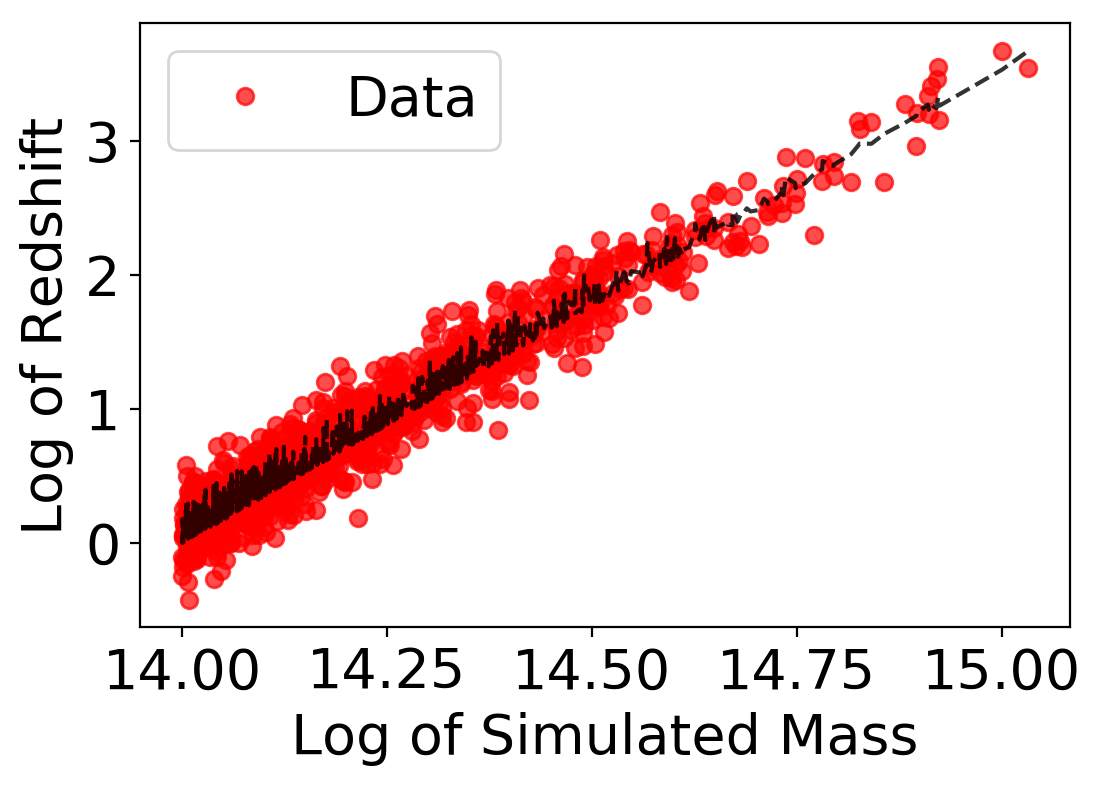

In [34]:
y2 = ln_zeta

f=lambda x,a,b: a*x + b
fit=curve_fit(f, x2, y2)
xsmooth=np.linspace(np.min(x2), np.max(x2), 1000)
plt.plot(x1,y2,'ro',label='Data', alpha = 0.7)
#plt.plot(xsmooth,f(xsmooth,*fit[0]),'b-',linewidth=2,label='Logarithmic Fit')
plt.xlabel('Log of Simulated Mass')
plt.ylabel('Log of Redshift')
plt.legend()


# Unlike the 1-D plot above (simple straight line), this is a vector that
# will create a slope which matches the log value from the previously
# calculated log of zeta based on the true parameter values
# found in (Grandis et al. 2021)

# Meant to compare with the simple 1-D plot above and display
# whether the simulated data is following the trend set by the real parameter values

plt.plot(x1[ix], ln_zeta_true[ix], 'k--', label='Truth', alpha = 0.8)

print('Combination of Slope and Y-Intercept:', fit[0])
print('Slope:', fit[0][0])
print('Y-Intercept:', fit[0][1])

In [21]:
out = dict()
out['z'] = zsims
out['M'] = msims
out['lambda'] = np.exp(ln_lambda)
out['zeta'] = np.exp(ln_zeta)
out['lambda_true'] = np.exp(ln_lambda_true)
out['zeta_true'] = np.exp(ln_zeta_true)

df = pd.DataFrame(out, columns = ['z', 'M', 'lambda', 'zeta', 'lambda_true', 'zeta_true'])
print(df)

#df.to_csv('fake_data_Jun21.csv', index=False)
# pd.DataFrame.to_csv('fake_data_Jun21.csv')

            z             M      lambda       zeta  lambda_true  zeta_true
0    0.333428  1.804308e+14   42.112493   2.338925    48.036353   2.594613
1    0.188952  1.650887e+14   38.903571   1.933053    42.910006   2.184757
2    0.105773  1.500579e+14   37.595662   1.855768    38.468092   1.851465
3    1.013530  1.069253e+14   29.283300   1.198634    31.566319   1.395590
4    0.123118  1.365094e+14   54.564243   2.539088    35.013314   1.607529
5    0.118092  2.364926e+14   58.615391   3.571110    61.285165   3.730482
6    0.307141  1.218350e+14   26.729013   1.134800    32.048929   1.411136
7    0.399462  1.568280e+14   34.792177   2.056620    42.080992   2.128536
8    0.353051  1.878246e+14   56.596136   3.461263    50.202134   2.773393
9    0.516780  1.563046e+14   46.951653   2.231467    42.759406   2.184567
10   0.808865  2.052820e+14   61.059862   3.956654    59.327162   3.592472
11   0.541491  2.814877e+14   96.486966   6.875839    78.240084   5.422132
12   1.113906  2.189112e+

In [22]:
df0 = df.copy()

display(df0)

,z,M,lambda,zeta,lambda_true,zeta_true
0,0.333428,1.804308e+14,42.112493,2.338925,48.036353,2.594613
1,0.188952,1.650887e+14,38.903571,1.933053,42.910006,2.184757
2,0.105773,1.500579e+14,37.595662,1.855768,38.468092,1.851465
3,1.013530,1.069253e+14,29.283300,1.198634,31.566319,1.395590
4,0.123118,1.365094e+14,54.564243,2.539088,35.013314,1.607529
5,0.118092,2.364926e+14,58.615391,3.571110,61.285165,3.730482
6,0.307141,1.218350e+14,26.729013,1.134800,32.048929,1.411136
7,0.399462,1.568280e+14,34.792177,2.056620,42.080992,2.128536
8,0.353051,1.878246e+14,56.596136,3.461263,50.202134,2.773393
9,0.516780,1.563046e+14,46.951653,2.231467,42.759406,2.184567


In [23]:
zeta = df0.zeta.to_numpy()
zetacut = zeta > 5
df = df0.loc[zetacut].copy()

display(df)

,z,M,lambda,zeta,lambda_true,zeta_true
11,0.541491,2.814877e+14,96.486966,6.875839,78.240084,5.422132
17,0.339246,8.190163e+14,261.426337,30.210858,224.954171,26.456244
23,0.875301,3.906543e+14,96.096094,8.326963,115.653252,9.814580
28,0.184550,2.915184e+14,86.690166,5.250543,76.588673,5.221205
32,0.160531,3.259359e+14,67.721513,5.388238,85.522200,6.161391
34,0.139559,3.828806e+14,133.769204,11.815746,100.485140,7.849785
36,0.384371,5.128113e+14,139.033101,13.079795,140.554654,13.051721
39,0.123628,4.029899e+14,99.309980,9.160741,105.632747,8.460393
52,0.561814,2.865826e+14,76.718943,6.235183,79.957764,5.604048
53,0.247266,7.196002e+14,144.165445,14.742504,194.322919,21.198364


In [24]:
df.to_csv(r'C:\MuStar_Project\mustar-summar-project\simple_model\fake_data_Jun21.csv', index=False)